In [ ]:
# Para uma boa seleção de features, ou seja, dos melhores atributos pra trabalhar no meu modelo, posso usar 3 técnicas: 
# 1) Seleção univariada - um tipo de seleção através de uma métrica estatística (pode ser Qui-quadrado,
# R2 score, recall, f1);
# 2) Através da importância - ou seja, eu vou nos atributos com o melhor score de importância;
# 3) Matriz de correlação ou  mapa de calor ou matriz de covariância: um gráfico em que veremos 
# uma densidade e escolhemos as que tem mais correlação

In [1]:
# Começando pela Seleção Univariada
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 #a métrica estatística utilizada é a do qui-quadrado

df = pd.read_csv("C:/Users/jllce/Downloads/train_phone.csv")

In [20]:
# Primeiro vou definir a minha variável target (y) e as variáveis explicativas (X)
X = df.iloc[:,0:20]
y = df.iloc[:,-1]

In [60]:
# Depois, 

bestfeatures = SelectKBest(score_func=chi2, k=10) #settando os parâmetros para a função SelectKBest
fit = bestfeatures.fit(X,y) #aplicando ela nas features

dfscores = pd.DataFrame(fit.scores_) #criando um dataframe com os scores
dfcolumns = pd.DataFrame(X.columns) #criando um dataframe com os nomes dos atributos que receberam os respectivos scores
featureScores = pd.concat([dfcolumns, dfscores],axis=1) #concatenando os dois df
featureScores.columns = ["Specs", "Score"] #apenas atribuindo nomes às duas colunas criadas

print(featureScores.nlargest(10,"Score").reset_index(drop=True)) #print dos 10 maiores scores e resetando o
                                                                 #índice pra ficar bonitinho

           Specs          Score
0            ram  931267.519053
1      px_height   17363.569536
2  battery_power   14129.866576
3       px_width    9810.586750
4      mobile_wt      95.972863
5     int_memory      89.839124
6           sc_w      16.480319
7      talk_time      13.236400
8             fc      10.135166
9           sc_h       9.614878


[0.05967547 0.02082299 0.03517797 0.01956021 0.03305772 0.01688997
 0.03593128 0.03392583 0.03750472 0.03382981 0.03535202 0.04637205
 0.04764313 0.38482841 0.03554461 0.03461771 0.03534872 0.01434469
 0.01888523 0.02068746]


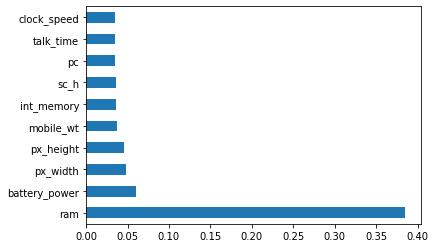

In [62]:
# 2) Importância

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

#instanciando e depois aplicando nas variáveis
model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_) #vai mostrar uma lista com as importâncias das features

feat_importances = pd.Series(model.feature_importances_, index=X.columns) #criando uma série (índice: nome dos atributos) 
feat_importances.nlargest(10).plot(kind="barh")
plt.show()

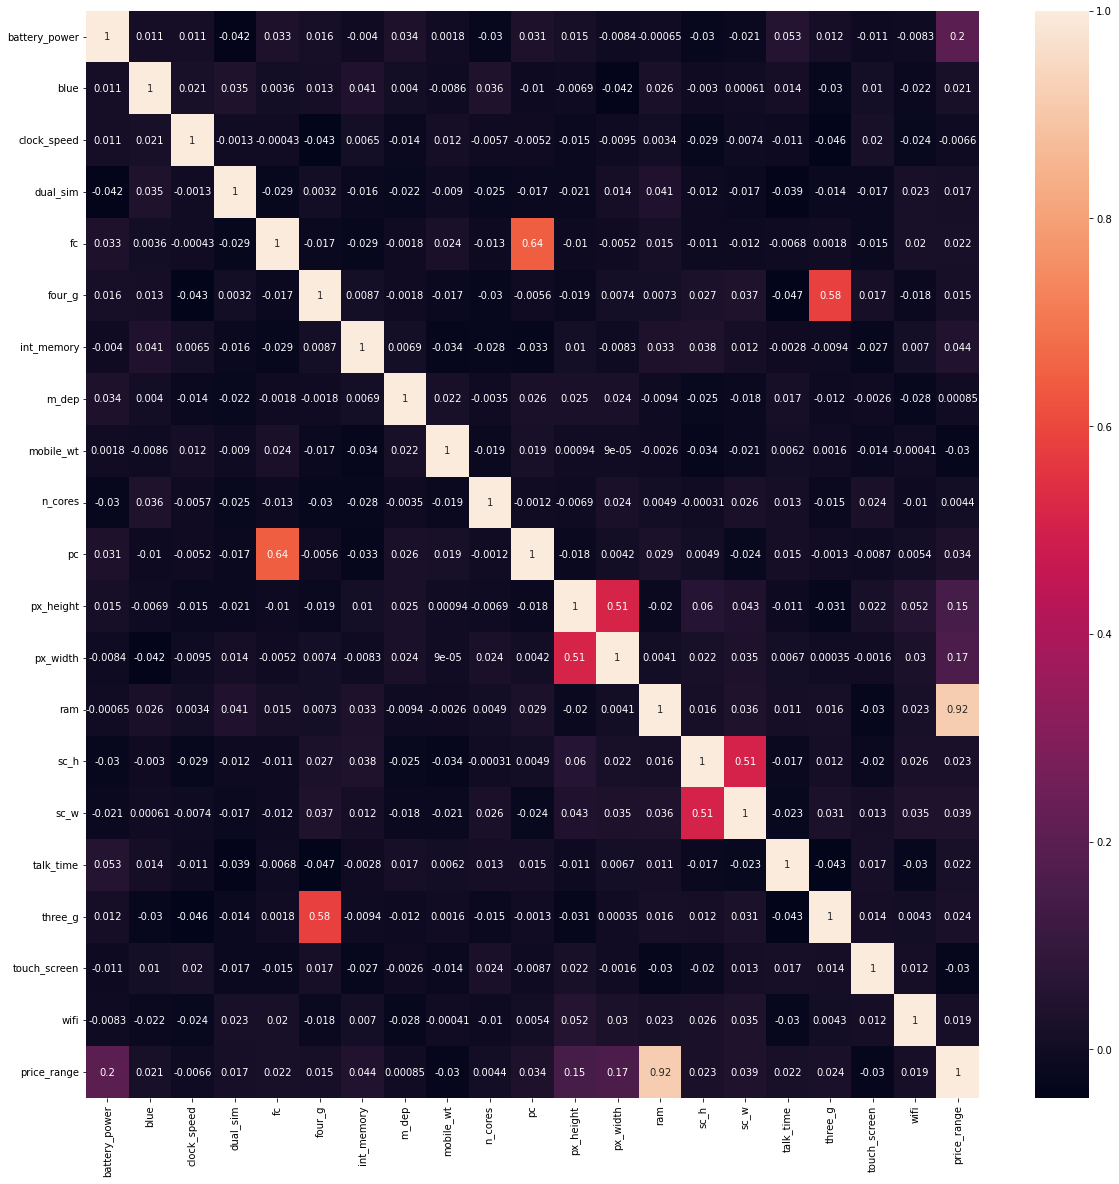

In [72]:
# 3) Matriz Correlação

import seaborn as sns

corrmat = df.corr() #criando as correlações entre as 21 variáveis (não só as independentes (X), mas tbm a y)
top_corr_features = corrmat.index #pegando os nomes dos índices para jogar no gráfico
plt.figure(figsize=(20,20))

g=sns.heatmap(df[top_corr_features].corr(),annot=True)